# Objectives

## 1. Cohort analysis

<br>

- *It is a descrpitive analytics tool. It groups the customers into mutually exclusive cohorts - which are then measured over time.*
    - Mutually exclusive segments - cohorts, avoiding vanity metrics
    - Compare metrics across **product** lifecycel 
    - Compare metrics across **customer** lifecycle

- Types of cohorts
    - **Time cohorts**: sign up for a product or a service
      - showing customer behaviors depending on the time they started to use company's product or services
    - **Behaviors cohors**: purchase a product or subscribe a service
      - it groups customers by the type or the service they signed up. Customer who signed up for a basic service might have different needs from those signed up for an advanced service
    - **Size cohorts**: the variouse sizes of customers who purchased company's products or services,  based on the amount spending in some period of time after acquistion, or the product type that the customer spent most of their order amount in some period of time
    
- Elements of cohort analysis in Python
    - pivot table
      - assigned cohort in **rows**
      - cohort index in **columns**
      - metrics in the **table**

- **Vanity metrics** vs **actionable metrics**
  - What’s the business decision you can make with the metric?
  - How can you intentionally reproduce the result?
  - Is the data a real reflection of the truth?

> - Determine **business health**: a great indicator of a healthy business is increasing revenue even if you aren’t acquiring new customers
> - Understand **customer's behavior**
> - Enhanced **customer segmentation**: By dividing user groups and creating specific cohorts, businesses can create more targeted and effective marketing campaigns and offer personalized customer experiences
> - Increased **customer retention**: it helps by analyzing retention rates and identifying potential churn risks. With this information, you can take proactive steps to improve customer experiences
> - Optimize your app for increased interest: to optimize the user experience and increase customer lifetime value by identifying trends and patterns in the customer lifecycle

## Time cohorts: based on month of the 1st purchase
> 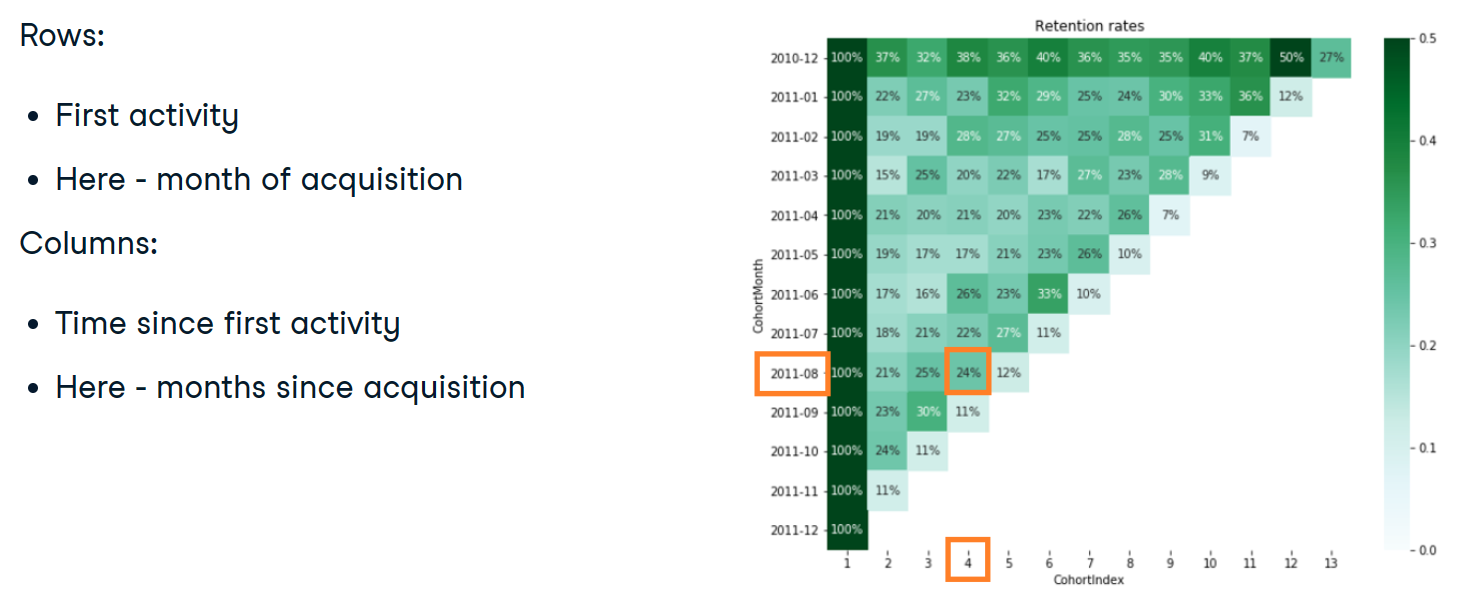
> - product retention rate and customer retention rate
> - abnormal churn rate, why? - Hypothesize about why users are leaving
    - Customer average churn rate
    - Compare that average churn rate to the rate for users who engage with certain features or complete a key action, for example: compared to the churn of users who use one of the core features of the productivity app: the checklist feature
    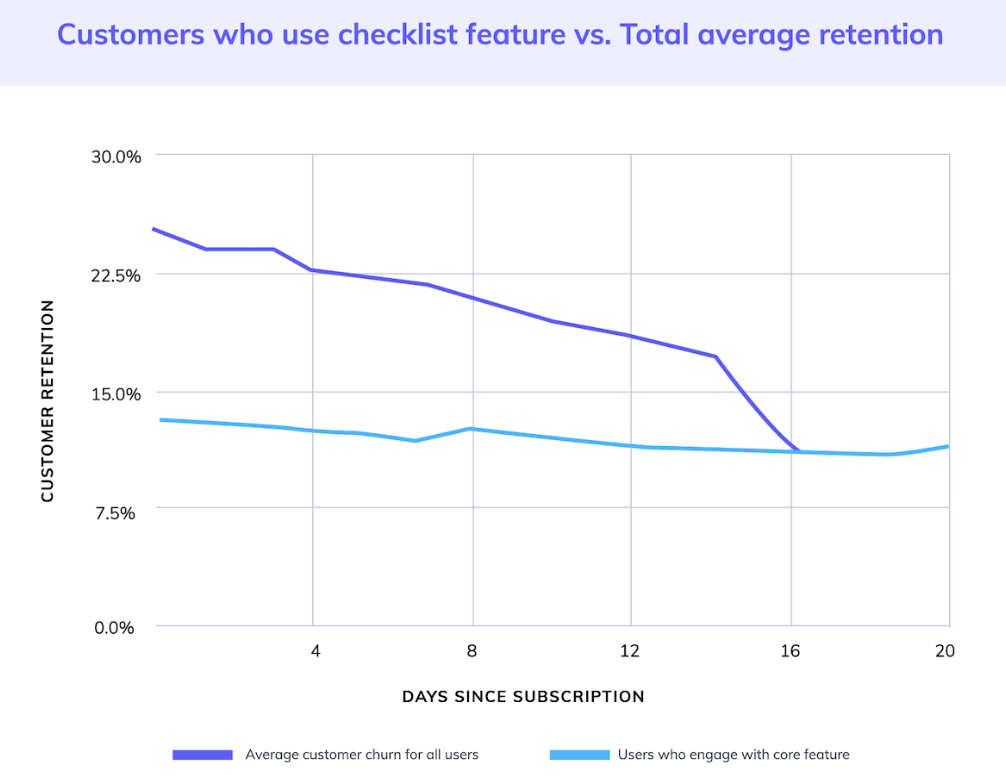
> - Use cohort tables to compare customer's behavior of different customer segments
> - test, modify and repeat

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [38]:
online = pd.read_csv('/QXJ/Python/Datacamp/Marketing/Customer_segment/chapter_1/online.csv',
                    parse_dates = ['InvoiceDate'],
                    index_col = 0)
online = online.reset_index(drop = True)
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,12.60
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,1.45
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,22.50
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2.10
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,17.85


### 1. Build cohort table

**Create invoice month and cohort month**

In [40]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)
online.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07


In [41]:
grouping = online.groupby(['CustomerID'])['InvoiceMonth']
# to assign smallest inovice month to each customer (acquisition month)
online['CohortMonth'] = grouping.transform('min')
online.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01


In [43]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   InvoiceNo     70864 non-null  int64         
 1   StockCode     70864 non-null  object        
 2   Description   70864 non-null  object        
 3   Quantity      70864 non-null  int64         
 4   InvoiceDate   70864 non-null  datetime64[ns]
 5   UnitPrice     70864 non-null  float64       
 6   CustomerID    70864 non-null  int64         
 7   Country       70864 non-null  object        
 8   InvoiceMonth  70864 non-null  datetime64[ns]
 9   CohortMonth   70864 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(3)
memory usage: 5.4+ MB


**Assign time offset value**

In [48]:
# extract integer values from data
def get_date_int(df, col):
    year = df[col].dt.year
    month = df[col].dt.month
    day = df[col].dt.day
    return year, month, day

invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')

cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')

year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

online['CohortIndex'] = year_diff * 12 + month_diff + 1
online.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1


**Count monthly active customers from each cohort**

In [70]:
# metric: how many customers retain
cohort_data = online.groupby(['CohortMonth','CohortIndex'])\
['CustomerID'].nunique()
cohort_counts = pd.DataFrame(cohort_data.unstack(level = 1))
cohort_counts.fillna('-')

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,-
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,-,-
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,-,-,-
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,-,-,-,-
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,-,-,-,-,-
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,-,-,-,-,-,-
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,-,-,-,-,-,-,-
2011-08-01,139.0,30.0,28.0,35.0,14.0,-,-,-,-,-,-,-,-


### 2. Cohort metrics
**Customer retention**: cohort_count table
- how many customers originally in each cohort in the *cohort_counts* table?
- how many of them were active in following month?

**Calculate retention rate**

In [92]:
# select the 1st column
cohort_size = cohort_counts.iloc[:,0]

# divide all values in the table by cohort_size
retention = cohort_counts.divide(cohort_size, axis = 0)

# review the retention table
retention = retention.round(3)
retention.fillna('-')

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.344,0.309,0.351,0.342,0.398,0.348,0.33,0.335,0.37,0.355,0.486,0.24
2011-01-01,1.0,0.208,0.247,0.244,0.331,0.271,0.247,0.259,0.313,0.307,0.373,0.136,-
2011-02-01,1.0,0.184,0.18,0.263,0.269,0.234,0.253,0.263,0.272,0.301,0.089,-,-
2011-03-01,1.0,0.162,0.258,0.196,0.214,0.173,0.253,0.219,0.276,0.098,-,-,-
2011-04-01,1.0,0.192,0.204,0.192,0.184,0.204,0.22,0.231,0.067,-,-,-,-
2011-05-01,1.0,0.161,0.173,0.145,0.209,0.233,0.245,0.088,-,-,-,-,-
2011-06-01,1.0,0.159,0.126,0.198,0.237,0.3,0.092,-,-,-,-,-,-
2011-07-01,1.0,0.162,0.179,0.22,0.254,0.098,-,-,-,-,-,-,-
2011-08-01,1.0,0.216,0.201,0.252,0.101,-,-,-,-,-,-,-,-


**Cohort quantity metric**

In [78]:
cohort_qty = online.groupby(['CohortMonth','CohortIndex'])\
['Quantity'].mean()
cohort_qty = pd.DataFrame(cohort_qty.unstack(level = 1)).round(1)
cohort_qty.fillna('-')

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.1,12.3,12.2,13.2,13.7,11.3,10.6,12.8,13.2,13.0,14.5,10.9,13.7
2011-01-01,10.9,10.8,10.0,10.1,14.3,13.2,17.4,16.4,18.7,10.2,10.7,13.2,-
2011-02-01,12.1,14.3,10.6,11.5,17.5,12.2,17.3,13.2,13.4,15.9,14.3,-,-
2011-03-01,9.6,14.2,13.0,10.2,16.1,12.7,11.6,11.5,9.0,9.6,-,-,-
2011-04-01,9.9,11.1,12.4,11.5,11.4,7.7,10.4,9.4,6.6,-,-,-,-
2011-05-01,14.1,9.6,15.3,11.6,11.9,8.5,9.8,7.3,-,-,-,-,-
2011-06-01,10.6,16.1,18.1,11.2,12.4,7.2,9.7,-,-,-,-,-,-
2011-07-01,10.9,16.4,5.6,10.1,6.2,7.0,-,-,-,-,-,-,-
2011-08-01,10.5,7.4,5.5,5.7,6.0,-,-,-,-,-,-,-,-


### 3. Visualizing cohort analysis

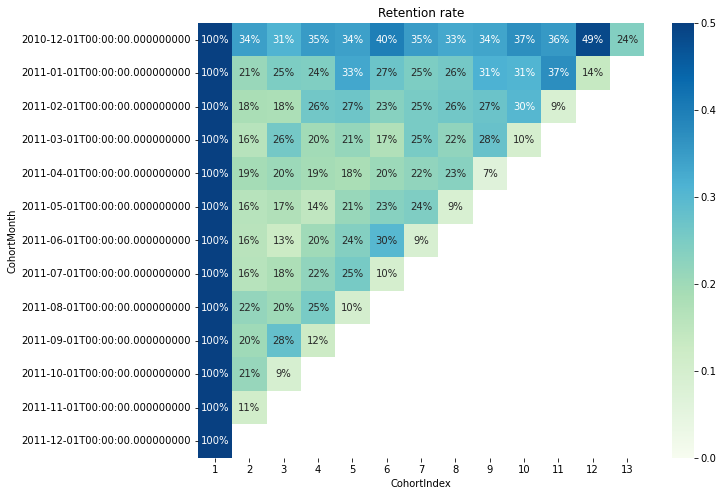

In [93]:
plt.figure(figsize = (10,8))
plt.title('Retention rate')
sns.heatmap(data = retention,
           annot = True,
            fmt = '.0%',
            vmin = 0.0,
            vmax = 0.5,
           cmap = 'GnBu')
plt.show()

### Assign daily turnover cohort

In [185]:
online['TotalAmount'] = online['UnitPrice'] * online['Quantity']
online.to_csv('/QXJ/Python/Datacamp/Marketing/Customer_segment/chapter_1/online.csv')
online.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,12.60
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,1.45
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,22.50


In [110]:
# Define a function that will parse the date
def get_day(x): return dt.datetime(x.year, x.month, x.day) 

# Create InvoiceDay column
online['InvoiceDay'] = online['InvoiceDate'].apply(get_day) 

# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceDay'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortDay'] = grouping.transform('min')

online.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,InvoiceDay,CohortDay,TotalAmount
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,195,2011-10-25,2011-04-11,12.60
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,69,2011-11-20,2011-09-12,1.45
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1,2011-07-14,2011-07-14,22.50


In [116]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceDay')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(online, 'CohortDay')

# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month


# Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 12 + months_diff + 1
online.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,InvoiceDay,CohortDay,TotalAmount
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7,2011-10-25,2011-04-11,12.60
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3,2011-11-20,2011-09-12,1.45
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1,2011-07-14,2011-07-14,22.50


In [117]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['TotalAmount'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='TotalAmount')
average_price.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,20.8,19.9,20.7,19.5,18.7,24.4,21.0,21.9,22.2,23.3,28.8,18.6,25.4
2011-01-01,21.4,18.2,19.4,24.6,26.5,23.4,29.6,29.0,40.6,20.5,21.6,20.1,NaN
2011-02-01,18.2,22.0,17.2,19.8,27.5,19.4,25.9,21.4,21.7,24.9,23.5,NaN,NaN
2011-03-01,17.5,19.2,23.2,16.1,19.1,17.8,18.0,20.1,14.5,14.6,NaN,NaN,NaN
2011-04-01,17.2,19.5,24.9,18.3,18.9,13.7,15.4,17.3,10.9,NaN,NaN,NaN,NaN
2011-05-01,21.4,19.3,22.0,19.2,18.2,14.3,17.0,12.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,14.6,19.5,27.7,17.2,14.3,11.5,15.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,17.4,26.3,10.5,15.7,11.1,8.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,18.0,14.4,12.6,17.3,13.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


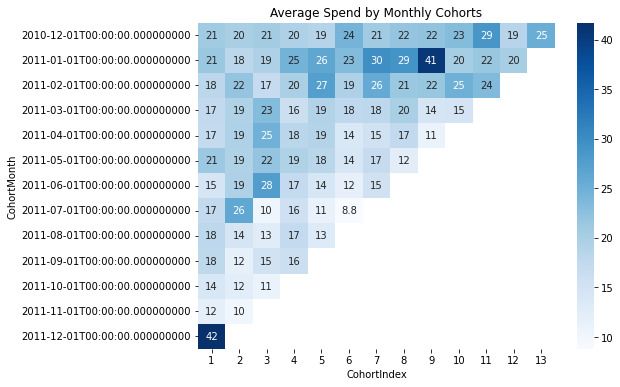

In [122]:
# Import seaborn package as sns
import seaborn as sns

# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(average_price, annot=True, cmap='Blues')
plt.show()

## 2. Recency, Frequency, Monetary Value analysis

### 1. Recency, frequency, monetary (RFM) segmentation
- Calculate the main metrics: 
    - **Recency (R)**: how recent was each customer's last purchase
    - **Frequency (F)**: how many purchases the customer has done in the last 12 months
    - **Monetary (M)**: how much the customer has spent in the last 12 months
- Grouping RFM values: high, medium and low 
    - **percentiles** e.g. quantiles: qcut()
    - **pareto 80/20 cut**
    - **custom** - based on business knowledge
- Process of calculating percentiles
    - sort customers based on that metric
    - break customers inot a pre-defined number of groups of each size
    - assign a label to each group
        - highest score to the best metric - best is not always highest e.g. recency
        - in this case, the label is inverse - the more recent the customer, the better

In [126]:
amount_qcut = online[['CustomerID', 'TotalAmount']].reset_index()
amount_qcut['SpendQuartile'] = pd.qcut(small_qcut['TotalAmount'],
                                            q = 4, 
                                            labels = range(1,5))
amount_qcut.sort_values('TotalAmount')                                    

,index,CustomerID,TotalAmount,SpendQuartile
1558,1558,15618,0.001,1
38205,38205,14104,0.100,1
4340,4340,14963,0.120,1
8898,8898,15006,0.120,1
40333,40333,17571,0.120,1
...,...,...,...,...
8975,8975,15195,3861.000,4
41858,41858,15749,4254.500,4
34523,34523,15749,4522.500,4
51542,51542,15749,4921.500,4


In [177]:
from datetime import datetime
recency_qcut = online[['CustomerID', 'InvoiceDate']].reset_index(drop = True)
recency_qcut  = recency_qcut.groupby(['CustomerID'])['InvoiceDate'].max()
recency_qcut = pd.DataFrame(recency_qcut)
recency_qcut['RecencyDays'] = datetime.now() - recency_qcut['InvoiceDate']
recency_qcut['RecencyDays'] = recency_qcut['RecencyDays'].dt.days

# create reversed labels
r_labels = list(range(4, 0, -1))
recency_quartile = pd.qcut(recency_qcut['RecencyDays'], 
                             q = 4,
                            labels = r_labels)
recency_qcut['RecencyQuartile'] = recency_quartile
recency_qcut.sort_values('RecencyDays')

,InvoiceDate,RecencyDays,RecencyQuartile
CustomerID,,,
13113,2011-12-09 12:49:00,4078,4
17554,2011-12-08 14:15:00,4078,4
17530,2011-12-08 18:42:00,4078,4
14730,2011-12-08 14:39:00,4078,4
13599,2011-12-08 16:10:00,4078,4
...,...,...,...
18074,2010-12-01 09:53:00,4451,1
16583,2010-12-01 12:03:00,4451,1
14045,2010-12-01 11:32:00,4451,1


In [178]:
# create custom labels
r_labels = ['Active', 'Lapsed', 'Inactive', 'Churned']
recency_quartile = pd.qcut(recency_qcut['RecencyDays'], 
                             q = 4,
                            labels = r_labels)
recency_qcut['RecencyQuartile'] = recency_quartile
recency_qcut.sort_values('RecencyDays')

,InvoiceDate,RecencyDays,RecencyQuartile
CustomerID,,,
13113,2011-12-09 12:49:00,4078,Active
17554,2011-12-08 14:15:00,4078,Active
17530,2011-12-08 18:42:00,4078,Active
14730,2011-12-08 14:39:00,4078,Active
13599,2011-12-08 16:10:00,4078,Active
...,...,...,...
18074,2010-12-01 09:53:00,4451,Churned
16583,2010-12-01 12:03:00,4451,Churned
14045,2010-12-01 11:32:00,4451,Churned


**Data preparation steps**

In [158]:
# Data preparation steps
print('Min:{}; Max:{}'.format(min(online.InvoiceDate),
                              max(online.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:49:00


*let's create a hypothetical **snapshot_day** data as if we are doing analysis recently.*

In [161]:
from datetime import timedelta
snapshot_date = max(online.InvoiceDate) + timedelta(days = 1)
snapshot_date

Timestamp('2011-12-10 12:49:00')

**Calculate FRM metrics**

In [186]:
# aggregate data on a customer level
datamart = online.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalAmount': 'sum'
})

# final FRM values
datamart.columns = ['Recency','Frequency', 'Monetary']
datamart.to_csv('/QXJ/Python/Datacamp/Marketing/Customer_segment/chapter_1/rfm.csv')
datamart.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747,2,27,992.82
12748,1,967,7522.06
12749,4,37,813.45
12820,3,17,268.02
12822,71,9,146.15


## 3. Building RFM segments

<br>

- *Calculate quartile value for each column and name them **R, F, M**.*
- *Concatenate RFM quartiles valuse to **RFM_Segment**.*
- *Sum RFM quartiles values to **RFM_Score**.*

> - **Core**: your best customers 
    - RFM Score: 111
    - Who They Are: Highly engaged customers who have bought the most recent, the most often, and generated the most revenue.
    -Marketing Strategies: Focus on loyalty programs and new product introductions. These customers have proven to have a higher willingness to pay, so don't use discount pricing to generate incremental sales. Instead, focus on value added offers through product recommendations based on previous purchases.
> - **Loyal**: your most loyal customers
    - RFM Score: x1x
    - Who They Are: Customers who buy the most often from your store.
    - Marketing Strategies: Loyalty programs are effective for these repeat visitors. Advocacy programs and reviews are also common X1X strategies. Lastly, consider rewarding these customers with Free Shipping or other like benefits.
> - **Whales**: your Highest Paying Customers
    - RFM Score: XX1
    - Who They Are: Customers who have generated the most revenue for your store.
    - Marketing Strategies: These customers have demonstrated a high willingness to pay. Consider premium offers, subscription tiers, luxury products, or value add cross/up-sells to increase AOV. Don't waste margin on discounts. 
> - **Promising**: your faithful customers
    - RFM Score: X13, X14
    - Who They Are: Customers who return often, but do not spend a lot.
    - Marketing Strategies: You've already succeeded in creating loyalty. Focus on increasing monetization through product recommendations based on past purchases and incentives tied to spending thresholds (pegged to your store AOV). 
> - **Rookies**: your Newest Customers
    - RFM Score: 14X
    - Who They Are: First time buyers on your site.
    - Marketing Strategies: Most customers never graduate to loyal. Having clear strategies in place for first time buyers such as triggered welcome emails will pay dividends.
> - **Slipping**: Once Loyal, Now Gone
    - RFM Score: 44X
    - Who They Are: Great past customers who haven't bought in awhile.
    - Marketing Strategies: Customers leave for a variety of reasons. Depending on your situation price deals, new product launches, or other retention strategies.

In [188]:
# recency quartile
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(datamart['Recency'], 4, labels = r_labels)
datamart = datamart.assign (R = r_quartiles.values)
datamart.head(3)

,Recency,Frequency,Monetary,R
CustomerID,,,,
12747,2,27,992.82,4
12748,1,967,7522.06,4
12749,4,37,813.45,4


In [191]:
f_labels = range(1,5)
m_labels = range(1,5)

f_quartiles = pd.qcut(datamart['Frequency'], 4, labels = f_labels)
m_quartiles = pd.qcut(datamart['Monetary'], 4, labels = m_labels)

datamart = datamart.assign(F = f_quartiles.values)
datamart = datamart.assign(M = m_quartiles.values)

datamart.to_csv('/QXJ/Python/Datacamp/Marketing/Customer_segment/chapter_1/rfm.csv')
datamart.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12747,2,27,992.82,4,4,4
12748,1,967,7522.06,4,4,4
12749,4,37,813.45,4,4,4
12820,3,17,268.02,4,3,3
12822,71,9,146.15,2,2,3


In [196]:
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

datamart['RFM_Segment'] = datamart.apply(join_rfm, axis = 1)
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis = 1)

datamart.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12747,2,27,992.82,4,4,4,444,12
12748,1,967,7522.06,4,4,4,444,12
12749,4,37,813.45,4,4,4,444,12
12820,3,17,268.02,4,3,3,433,10
12822,71,9,146.15,2,2,3,223,7


In [198]:
# sort the values
datamart.groupby('RFM_Segment').size().sort_values(ascending = False)[:10]

RFM_Segment
444    382
111    346
211    168
344    162
233    132
222    130
311    120
433    119
333    118
122    116
dtype: int64

In [199]:
# filter on RFM segments 
datamart[datamart['RFM_Segment'] == '111'][:5]

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12837,173,2,10.55,1,1,1,111,3
12852,295,2,32.55,1,1,1,111,3
12902,265,4,42.03,1,1,1,111,3
12922,161,4,57.24,1,1,1,111,3
12929,312,3,42.90,1,1,1,111,3


In [201]:
# summary metrics per RFM
datamart.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3           256.7       2.0     28.5   346
4           175.7       3.2     48.0   348
5           145.3       4.3     79.6   406
6           105.4       6.4    149.4   433
7            82.8       8.9    163.1   384
8            63.4      12.8    198.6   382
9            48.4      16.8    330.0   347
10           32.9      24.5    438.8   364
11           21.6      38.8    709.4   309
12            7.6      77.3   1709.0   382

In [202]:
# grouping into named segments based on RFM_score
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return 'Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Silver'
    else:
        return 'Bronze'
    
datamart['General_Segment'] = datamart.apply(segment_me, axis = 1)

datamart.groupby('General_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

Recency Frequency Monetary      
                   mean      mean     mean count
General_Segment                                 
Bronze            216.1       2.6     38.3   694
Gold               27.4      40.1    817.6  1402
Silver            100.1       8.0    146.7  1605

## 3. Data pre-processing for K-mean clustering
- Key k-means assumptions 
  - symmetric distribution of variables (not skewed)
  - variables with same average values
  - variables with same variance
  - K-means assumes variables on the same scale: equal mean and equal variance

> **Investigate the distirubtion to check the assumption**
> - Skew removed with logarithmic transformation but it only works on **positive** values
> - Box-Cow transformation

In [10]:
datamart = pd.read_csv('/QXJ/Python/Datacamp/Marketing/Customer_segment/chapter_1/datamart.csv')
datamart.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,General_Segment
0,12747,2,27,992.82,4,4,4,444,12,Gold
1,12748,1,967,7522.06,4,4,4,444,12,Gold
2,12749,4,37,813.45,4,4,4,444,12,Gold
3,12820,3,17,268.02,4,3,3,433,10,Gold
4,12822,71,9,146.15,2,2,3,223,7,Silver


In [47]:
rfm = datamart[['CustomerID','Recency', 'Frequency', 'Monetary']]
rfm = pd.DataFrame(rfm)
rfm.to_csv('/QXJ/Python/Datacamp/Marketing/Customer_segment/chapter_1/rfm.csv')
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12747,2,27,992.82
1,12748,1,967,7522.06
2,12749,4,37,813.45
3,12820,3,17,268.02
4,12822,71,9,146.15


In [210]:
rfm.describe()

,Recency,Frequency,Monetary
count,3701.000000,3701.000000,3701.000000
mean,94.298568,19.147257,380.535069
std,99.974969,44.831615,1474.285937
min,1.000000,1.000000,0.650000
25%,19.000000,4.000000,59.400000
50%,52.000000,9.000000,140.300000
75%,151.000000,21.000000,337.800000
max,374.000000,1532.000000,59596.070000


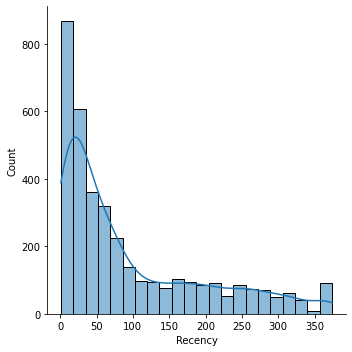

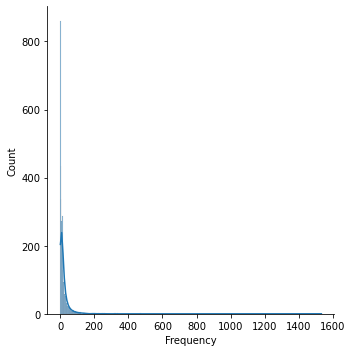

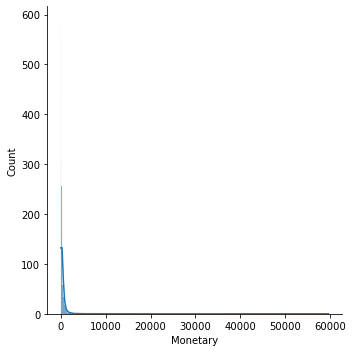

In [224]:
sns.displot(rfm['Recency'], kde = True)
sns.displot(rfm['Frequency'], kde = True)
sns.displot(rfm['Monetary'], kde = True)

plt.show()

**Logarithmic  transformation (positive values only)**
- Dealing with negative values
  - add constant value to each variable: absolute value of the lowest negative to make the smallest value as 1
  - other transformation: cube root transformation

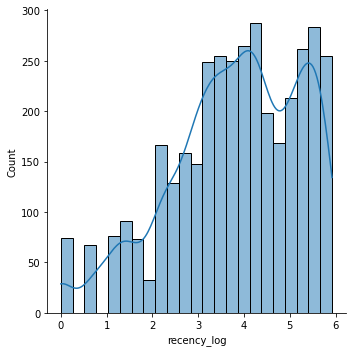

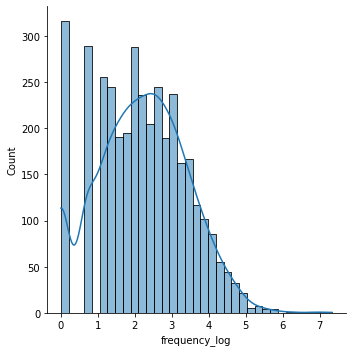

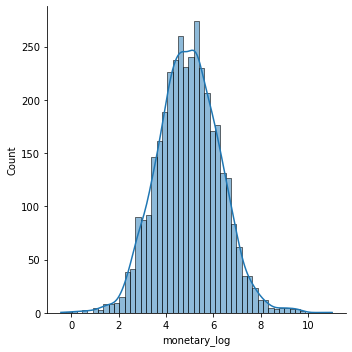

In [226]:
rfm['recency_log'] = np.log(rfm['Recency'])
rfm['frequency_log'] = np.log(rfm['Frequency'])
rfm['monetary_log'] = np.log(rfm['Monetary'])

sns.displot(rfm['recency_log'], kde = True)
sns.displot(rfm['frequency_log'], kde = True)
sns.displot(rfm['monetary_log'], kde = True)

plt.show()

**Centering and scaling data**
- diagnostics
    - analyze key statistics of the dataset
    - compare mean and standard deviation
- solution: centering and scaling the data 
    - substracting mean from each observation / divided by standard deviation 
    - Use a scaler from **scikit-learn**, returning array 

In [228]:
rfm.head()

,Recency,Frequency,Monetary,recency_log,frequency_log,monetary_log
CustomerID,,,,,,
12747,2,27,992.82,0.693147,3.295837,6.900549
12748,1,967,7522.06,0.000000,6.874198,8.925595
12749,4,37,813.45,1.386294,3.610918,6.701284
12820,3,17,268.02,1.098612,2.833213,5.591062
12822,71,9,146.15,4.262680,2.197225,4.984633


In [231]:
rfm.describe()

,Recency,Frequency,Monetary,recency_log,frequency_log,monetary_log
count,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000
mean,94.298568,19.147257,380.535069,3.805987,2.187146,4.950044
std,99.974969,44.831615,1474.285937,1.417927,1.219148,1.315526
min,1.000000,1.000000,0.650000,0.000000,0.000000,-0.430783
25%,19.000000,4.000000,59.400000,2.944439,1.386294,4.084294
50%,52.000000,9.000000,140.300000,3.951244,2.197225,4.943783
75%,151.000000,21.000000,337.800000,5.017280,3.044522,5.822454
max,374.000000,1532.000000,59596.070000,5.924256,7.334329,10.995345


In [233]:
rfm_scaled = (rfm - rfm.mean())/ rfm.std()
rfm_scaled.describe().round(2)

,Recency,Frequency,Monetary,recency_log,frequency_log,monetary_log
count,3701.00,3701.00,3701.00,3701.00,3701.00,3701.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.93,-0.40,-0.26,-2.68,-1.79,-4.09
25%,-0.75,-0.34,-0.22,-0.61,-0.66,-0.66
50%,-0.42,-0.23,-0.16,0.10,0.01,-0.00
75%,0.57,0.04,-0.03,0.85,0.70,0.66
max,2.80,33.75,40.17,1.49,4.22,4.60


**althernative solution**

In [245]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm)
rfm_normalized = scaler.transform(rfm)
print('mean:',rfm_normalized.mean(axis = 0).round(2))
print('std:', rfm_normalized.std(axis = 0).round(2))

mean: [-0.  0.  0.  0.  0.  0.]
std: [1. 1. 1. 1. 1. 1.]


In [248]:
rfm_normalized = pd.DataFrame(rfm_normalized,
                              index = rfm.index,
                             columns = rfm.columns)

rfm_normalized.describe().round(2)

,Recency,Frequency,Monetary,recency_log,frequency_log,monetary_log
count,3701.00,3701.00,3701.00,3701.00,3701.00,3701.00
mean,-0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.93,-0.40,-0.26,-2.68,-1.79,-4.09
25%,-0.75,-0.34,-0.22,-0.61,-0.66,-0.66
50%,-0.42,-0.23,-0.16,0.10,0.01,-0.00
75%,0.57,0.04,-0.03,0.85,0.70,0.66
max,2.80,33.75,40.17,1.49,4.22,4.60


### Pre-processing pipeline
- Unskew the data - log transformation
- Standardize to the same average values
- Scale to the same standard deviation
- Store as a separate array to be used for clustering

In [49]:
# Unskew the data 
rfm_log = np.log(rfm)

# normalize the variables 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)

# store for clustering
rfm_normalized = scaler.transform(rfm_log)

rfm_normalized[:5]

array([[-1.91759425, -2.19564198,  0.90952097,  1.48288174],
       [-1.91681989, -2.68455336,  3.84505048,  3.02243314],
       [-1.91604559, -1.7067306 ,  1.16799951,  1.33138958],
       [-1.86122499, -1.90964715,  0.5300051 ,  0.48733705],
       [-1.85968515,  0.322128  ,  0.00826807,  0.02629702]])

In [50]:
rfm_normalized = pd.DataFrame(rfm_normalized,
                              index = rfm.index,
                             columns = rfm.columns)
rfm_normalized.to_csv('/QXJ/Python/Datacamp/Marketing/Customer_segment/chapter_1/rfm_normalized.csv')
rfm_normalized.describe().round(2)

,CustomerID,Recency,Frequency,Monetary
count,3701.00,3701.00,3701.00,3701.00
mean,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.92,-2.68,-1.79,-4.09
25%,-0.84,-0.61,-0.66,-0.66
50%,0.06,0.10,0.01,-0.00
75%,0.86,0.85,0.70,0.66
max,1.64,1.49,4.22,4.60


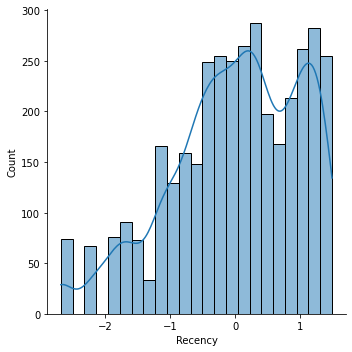

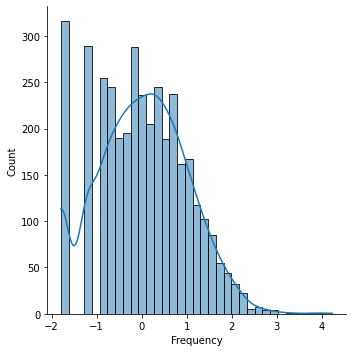

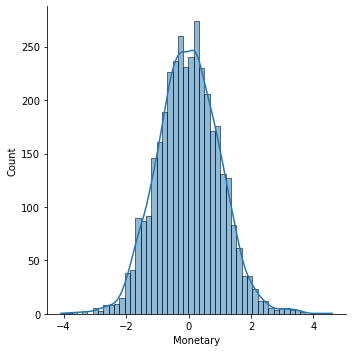

In [257]:
sns.displot(rfm_normalized['Recency'], kde = True)
sns.displot(rfm_normalized['Frequency'], kde = True)
sns.displot(rfm_normalized['Monetary'], kde = True)

plt.show()

## 4. Customer Segmentation with K-mean
- Data pre-processing
- Choosing a number of clusters
- Running k-means clustering on pre-processed data 
- Analyzing average RFM values of each cluster
  - Visual methods: elbow criterion
    - Plot the number of clusers against within-cluster sum-of-squared-errors (SSE) - sum of squared distances from every data point to their cluster centre
    - Identify an 'elbow' in the plot
    - Elbow - a point representing an 'optimal' number of clusters
  - Mathematical methods: silhouette coefficient 
  - Experimentation and interpretation
    - Build clustering at and around elbow solution
    - Analyse their properties - average RFM values
    - Compare against each other and choose one which makes more business sense 
- Profile and interpret segments
  - Summary statistics for each cluster e.g. average RFM values
  - Snake plot
  - Importance score and heatmap

In [51]:
rfm_normalized = pd.read_csv('/QXJ/Python/Datacamp/Marketing/Customer_segment/chapter_1/rfm_normalized.csv',
                    index_col = 0)

rfm_normalized.describe()

,CustomerID,Recency,Frequency,Monetary
count,3.701000e+03,3.701000e+03,3.701000e+03,3.701000e+03
mean,-9.680209e-15,2.053620e-16,8.718895e-17,1.670284e-16
std,1.000135e+00,1.000135e+00,1.000135e+00,1.000135e+00
min,-1.917594e+00,-2.684553e+00,-1.794238e+00,-4.090801e+00
25%,-8.416204e-01,-6.076932e-01,-6.569832e-01,-6.581905e-01
50%,5.776497e-02,1.024565e-01,8.268065e-03,-4.759786e-03
75%,8.633255e-01,8.543851e-01,7.033537e-01,6.632543e-01
max,1.644852e+00,1.494121e+00,4.222521e+00,4.595971e+00


**Running k-means**

In [48]:
rfm = pd.read_csv('/QXJ/Python/Datacamp/Marketing/Customer_segment/chapter_1/rfm.csv',
                 index_col = 0)
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12747,2,27,992.82
1,12748,1,967,7522.06
2,12749,4,37,813.45
3,12820,3,17,268.02
4,12822,71,9,146.15


In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 1)

In [29]:
# compute k-means clustering on pre-processed data 
kmeans.fit(rfm_normalized)

# extract cluster labels from labels_attribute
cluster_labels = kmeans.labels_

**Analyzing average RFM values of each cluster**

In [31]:
# create a cluster label columns
rfm_k3 = rfm.assign(Cluster = cluster_labels)

# calculate average RFM values and size for each cluster 
rfm_k3.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(0)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          14.0      53.0   1128.0   855
1         172.0       3.0     55.0  1225
2          78.0      14.0    232.0  1621

**Above is the result of a simple 3-cluster solution**

**Chosing the number of clusters**

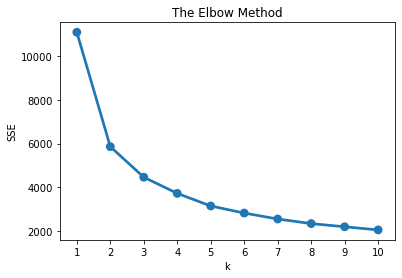

In [40]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 1)
    kmeans.fit(rfm_normalized)
    sse[k] = kmeans.inertia_
    # sum of square distance to closest cluster centre

# plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

**Test n_clusters = 4**

In [43]:
kmeans = KMeans(n_clusters = 4, random_state = 1)
kmeans.fit(rfm_normalized)
cluster_labels = kmeans.labels_

rfm_k4 = rfm.assign(Cluster = cluster_labels)
rfm_k4.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         130.9      12.6    246.7  1110
1          18.9      10.8    149.5   752
2          18.3      55.8   1184.0   824
3         171.9       2.7     45.8  1015

### Profile and interpret segments

**Summary statistics of each cluster**
- run k-means segmentation for serval k values around the recommended value
- create a cluster label columns in the original DataFrame
- Calculate average RFM values and sizes for each cluster

**Snake plots to understand and compare segments**
- market reasearch technique to compare different segments 
- visual representation of each segment's attributes
- need to first normalize data(center & scale)
- plot each cluster's average normalized values of each attribute

In [44]:
rfm_normalized.head()

,Recency,Frequency,Monetary
0,-2.195642,0.909521,1.482882
1,-2.684553,3.845050,3.022433
2,-1.706731,1.168000,1.331390
3,-1.909647,0.530005,0.487337
4,0.322128,0.008268,0.026297


In [54]:
# add the cluster_labels
rfm_normalized['Cluster'] = rfm_k4['Cluster']
rfm_normalized.head(2)

,CustomerID,Recency,Frequency,Monetary,Cluster
0,-1.917594,-2.195642,0.909521,1.482882,2
1,-1.916820,-2.684553,3.845050,3.022433,2


In [76]:
# melt into long format 
rfm_melt = pd.melt(rfm_normalized.reset_index(),
                  id_vars = ['CustomerID', 'Cluster'],
                  value_vars =['Recency', 'Frequency','Monetary'],
                  var_name = 'Attribute',
                  value_name = 'Value')
rfm_melt.to_csv('/QXJ/Python/Datacamp/Marketing/Customer_segment/chapter_1/rfm_melt.csv',)

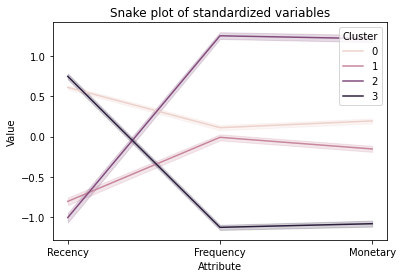

In [57]:
# visualize a snake plot
plt.title('Snake plot of standardized variables')
sns.lineplot(x='Attribute',
             y='Value',
             hue = 'Cluster',
             data = rfm_melt)
plt.show()

**Relative importance of segment attributes**
- useful technique to identify relative importance of each segment's attribute 
- calculate average values of each cluster
- calculate average valuse of population
- calculate importance score by deviding them and substract 1(ensure 0 is returned cluster average equals population average)
- as a ratio moves away from 0, attribute importance for a segment (relative to total pop) increases

In [59]:
# calculate importance score
cluster_avg = rfm_k4.groupby(['Cluster']).mean()
population_avg = rfm.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,CustomerID,Frequency,Monetary,Recency
Cluster,,,,
0,NaN,-0.34,-0.35,0.39
1,NaN,-0.44,-0.61,-0.80
2,NaN,1.92,2.11,-0.81
3,NaN,-0.86,-0.88,0.82


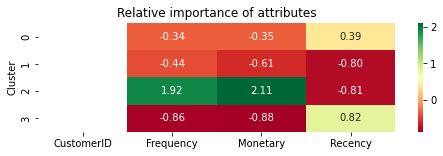

In [69]:
# plot heatmap
plt.figure(figsize = (8,2))
sns.heatmap(relative_imp, 
            annot = True, 
            fmt = '.2f',
            cmap = 'RdYlGn')
plt.title ('Relative importance of attributes')
plt.show()

### End-to-end segmentation solution
- Gather data - updated data with additonal variable
- Pre-proecess the data
- Explore the data and decide on the number of clusters
- Run k-means clustering
- Analyze and visualize results

*Additonal **Tenure**: time since the first transaction, which defines how long the cusomer has been with the company*

In [71]:
rfmt = pd.read_csv('/QXJ/Python/Datacamp/Marketing/Customer_segment/chapter_4/datamart_rfmt.csv',
                 index_col = 0)

rfmt.head()

,Recency,Frequency,MonetaryValue,Tenure
CustomerID,,,,
12747,3,25,948.70,362
12748,1,888,7046.16,365
12749,4,37,813.45,214
12820,4,17,268.02,327
12822,71,9,146.15,88


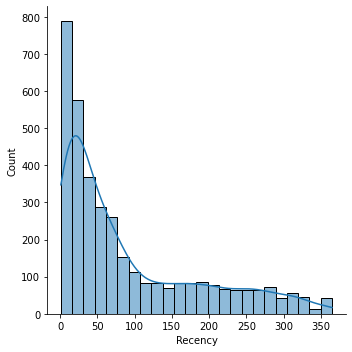

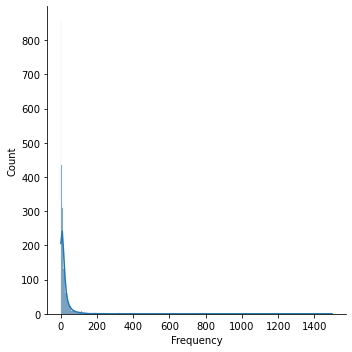

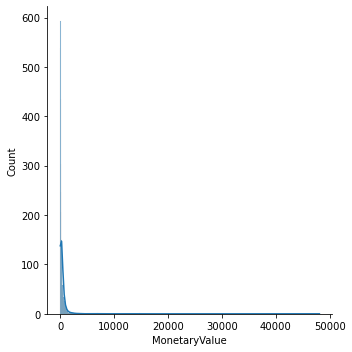

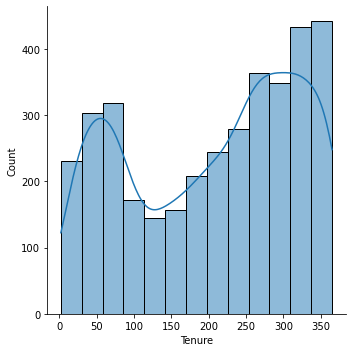

In [74]:
# investigate the distribution 
sns.displot(rfmt['Recency'], kde = True)
sns.displot(rfmt['Frequency'], kde = True)
sns.displot(rfmt['MonetaryValue'], kde = True)
sns.displot(rfmt['Tenure'], kde = True)
plt.show()

In [75]:
# summarize the data 
rfmt.describe().round(2)

,Recency,Frequency,MonetaryValue,Tenure
count,3643.00,3643.00,3643.00,3643.00
mean,90.44,18.71,370.69,206.53
std,94.45,43.75,1347.44,112.70
min,1.00,1.00,0.65,2.00
25%,19.00,4.00,58.70,90.00
50%,51.00,9.00,136.37,233.00
75%,139.00,21.00,334.35,306.00
max,365.00,1497.00,48060.35,365.00


In [82]:
# normalize 
rfmt_log = np.log(rfmt)
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(rfmt_log)
rfmt_normalized = scaler.transform(rfmt_log)
rfmt_normalized[:5]

array([[-2.00220213,  0.865157  ,  1.4649405 ,  0.91969471],
       [-2.81451782,  3.81527235,  2.99469233,  0.92875045],
       [-1.78948954,  1.18911731,  1.34759823,  0.34290634],
       [-1.78948954,  0.54646842,  0.5005946 ,  0.8081221 ],
       [ 0.33731451,  0.02092505,  0.03794262, -0.63215123]])

In [83]:
rfmt_normalized = pd.DataFrame(rfmt_normalized,
                              index = rfmt.index,
                              columns = rfmt.columns)
rfmt_normalized.head(3)

,Recency,Frequency,MonetaryValue,Tenure
CustomerID,,,,
12747,-2.002202,0.865157,1.464940,0.919695
12748,-2.814518,3.815272,2.994692,0.928750
12749,-1.789490,1.189117,1.347598,0.342906


In [84]:
rfmt_normalized.to_csv('/QXJ/Python/Datacamp/Marketing/Customer_segment/chapter_4/rfmt_normalized.csv')

In [85]:
rfmt_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue,Tenure
count,3643.00,3643.00,3643.00,3643.00
mean,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-2.81,-1.79,-4.09,-4.78
25%,-0.64,-0.65,-0.66,-0.61
50%,0.09,0.02,-0.01,0.44
75%,0.83,0.72,0.67,0.74
max,1.55,4.25,4.46,0.93


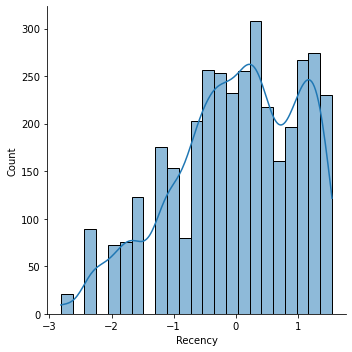

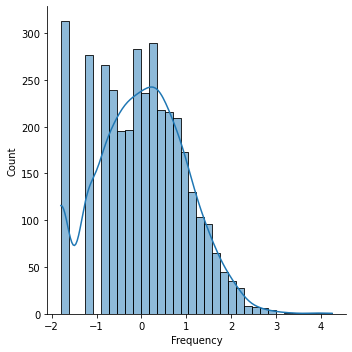

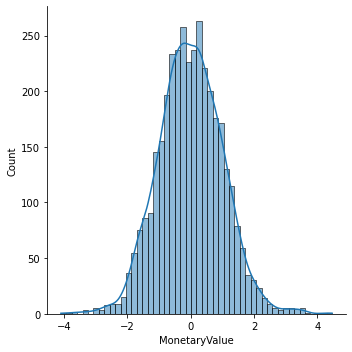

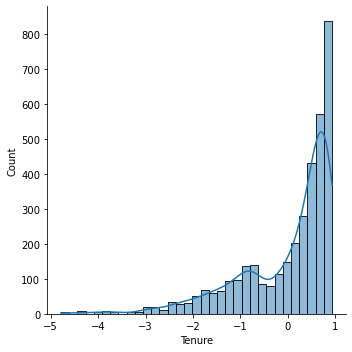

In [86]:
# investigate the distribution 
sns.displot(rfmt_normalized['Recency'], kde = True)
sns.displot(rfmt_normalized['Frequency'], kde = True)
sns.displot(rfmt_normalized['MonetaryValue'], kde = True)
sns.displot(rfmt_normalized['Tenure'], kde = True)
plt.show()

In [87]:
# find the elbow of KMeans cluster 
from sklearn.cluster import KMeans
sse = {}
for k in range (1,15):
    kmeans = KMeans(n_clusters = k, random_state = 1)
    kmeans.fit(rfmt_normalized)
    sse[k] = kmeans.inertia_
    
sse

{1: 14571.999999999996,
 2: 9083.13672908022,
 3: 6456.408683215845,
 4: 5276.796324841555,
 5: 4730.872816512952,
 6: 4223.193536975266,
 7: 3816.2100041933595,
 8: 3482.8817531487816,
 9: 3251.736507323439,
 10: 3046.472690659653,
 11: 2879.789663230786,
 12: 2744.194819178357,
 13: 2625.281376249742,
 14: 2516.3563047228777}

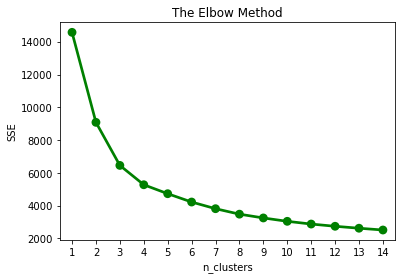

In [104]:
# plot elbow
sns.pointplot(x=list(sse.keys()), y=list(sse.values()), color = 'Green')
plt.title("The Elbow Method")
plt.xlabel("n_clusters")
plt.ylabel("SSE")
plt.show()

In [113]:
# test the statistical summary of clusters of 4
kmeans = KMeans(n_clusters = 4, random_state = 1)
kmeans.fit(rfmt_normalized)
cluster_labels = kmeans.labels_

rfmt_k4 = rfmt.assign(Cluster = cluster_labels)

rfmt_k4.groupby(['Cluster']).agg({
    'Recency' : 'mean',
    'Frequency': 'mean',
    'MonetaryValue':['mean', 'count'],
    'Tenure': 'mean'
}).round(0)

Recency Frequency MonetaryValue       Tenure
           mean      mean          mean count   mean
Cluster                                             
0          14.0      54.0        1143.0   777  280.0
1          33.0       7.0         101.0   750   45.0
2          89.0      15.0         277.0  1204  247.0
3         205.0       3.0          59.0   912  223.0

In [117]:
# test the statistical summary of clusters of 5
kmeans = KMeans(n_clusters = 5, random_state = 1)
kmeans.fit(rfmt_normalized)
cluster_label = kmeans.labels_

rfmt_k5 = rfmt.assign(Cluster = cluster_label)
rfmt_k5.groupby(['Cluster']).agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count'],
    'Tenure':'mean'
}).round(0)

Recency Frequency MonetaryValue       Tenure
           mean      mean          mean count   mean
Cluster                                             
0          12.0      56.0        1205.0   710  284.0
1          56.0       4.0          72.0   589   74.0
2         226.0       4.0          65.0   819  247.0
3          82.0      16.0         296.0  1181  250.0
4          16.0      11.0         143.0   344   29.0

**k = 4 makes more business sense**

In [122]:
# plot k = 4 snake plot
rfmt_melt = pd.melt(rfmt_k5.reset_index(),
                   id_vars = ['CustomerID', 'Cluster'],
                   value_vars = ['Recency', 'Frequency', 'MonetaryValue', 'Tenure'],
                   var_name = 'Metrics',
                   value_name = 'Scores')
rfmt_melt.head(3)

,CustomerID,Cluster,Metrics,Scores
0,12747,0,Recency,3.0
1,12748,0,Recency,1.0
2,12749,0,Recency,4.0


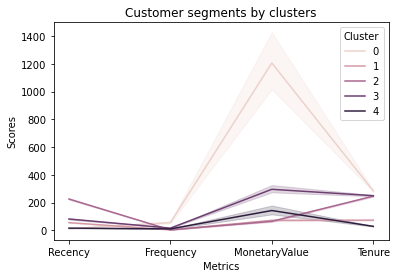

In [125]:
sns.lineplot(data = rfmt_melt, x = 'Metrics', y= 'Scores', hue = 'Cluster')
plt.title('Customer segments by clusters')
plt.show()

In [127]:
# compute importance score 
cluster_avg = rfmt_k4.groupby('Cluster').mean()
pop_avg = rfmt.mean()
import_ind = cluster_avg / pop_avg - 1
import_ind

,Recency,Frequency,MonetaryValue,Tenure
Cluster,,,,
0,-0.850360,1.868103,2.082986,0.353823
1,-0.634996,-0.616050,-0.727427,-0.780940
2,-0.015342,-0.196785,-0.253574,0.198265
3,1.266939,-0.825164,-0.841673,0.079029


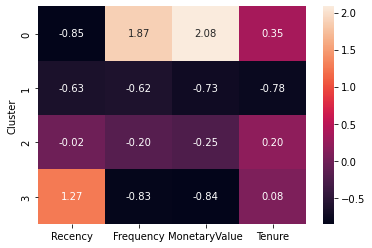

In [129]:
# plt heatmap 
sns.heatmap(import_ind, annot = True, fmt='.2f')
plt.show()